<a href="https://colab.research.google.com/github/WONYOUNG-SONG/DeepLearningTensorFlow2/blob/main/Lab10_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab10: MNIST**

# **Activation Functions**

**Reminder: activation function is the non-linear function that we apply over the output data coming out of a particular layer of neurons before it propagates as the input to the next layer.**

**If a neural network is working without activation functions, every neuron will only be performing a linear transformation on the inputs using the weights and biases.**

**Let's look at examples of activation functions.**

# **Sigmoid**

**Sigmoid function compresses inputs to the range of 0 to 1.**

**The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0, as shown below.**

<div>
  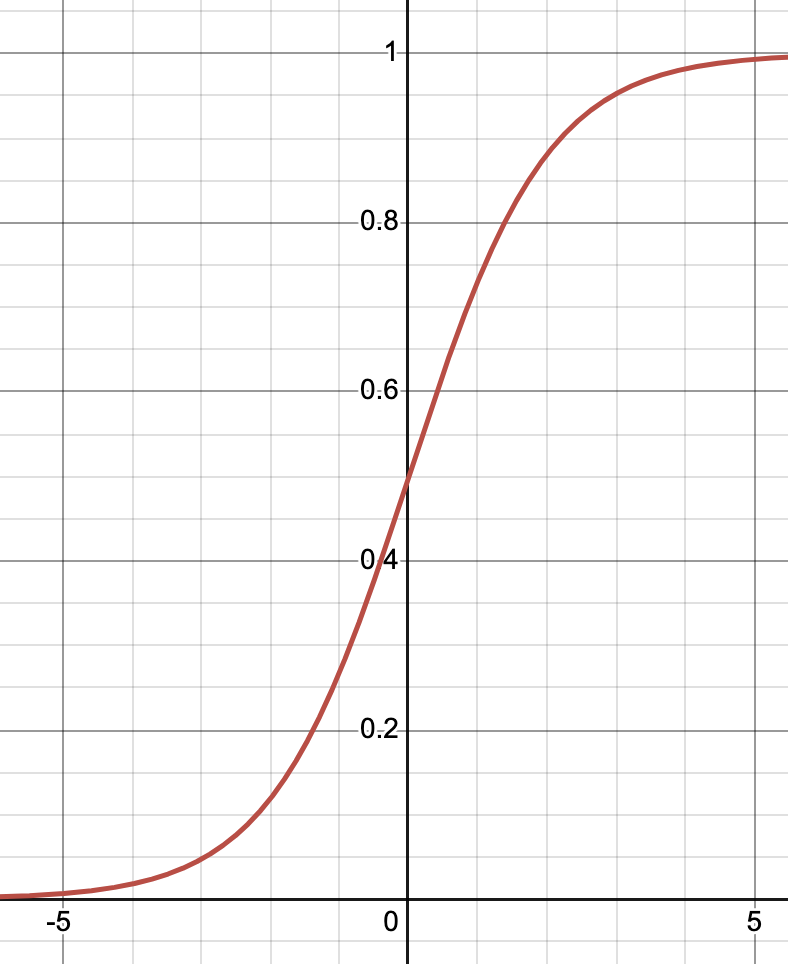
</div>

**Mathematically:**

$$
f(x) = \frac{1}{1+e^{-x}}
$$

**> the sum of the outputs of a sigmoid function can be over 1, which can't be thought of as probability.**

**In this case, we need Softmax function to make the sum of the outputs 1.**

# **Tanh**

**Tanh function is similar to Sigmoid function because the range of its ouput is -1 to 1 (-1, 1)**

<div>
  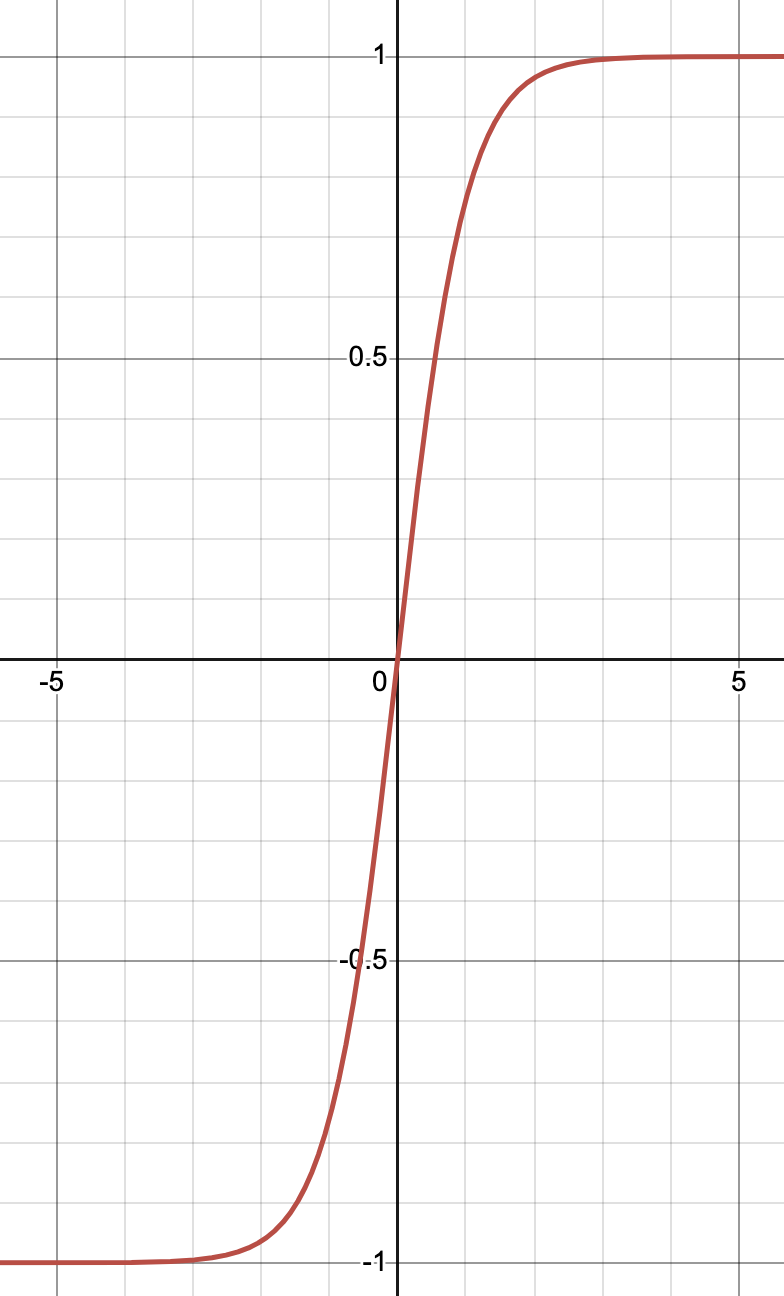
</div>

**Mathematically:**

$$
f(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}
$$

In [ ]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf

learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

# change data shape
print(x_train.shape)  # (60000, 28, 28)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

# change result to one-hot encoding
# in tf1, one_hot= True in read_data_sets("MNIST_data/", one_hot=True)
# took care of it, but here we need to manually convert them
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
# array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes. The number of rows
#  stays the same. to_categorical(labels)
# array([[ 1.,  0.,  0.],
#        [ 0.,  0.,  1.],
#        [ 0.,  1.,  0.],
#        [ 0.,  0.,  1.],
#        [ 1.,  0.,  0.]], dtype=float32)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=10, input_dim=784, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(0.001), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

predictions = tf.model.predict(x_test)
print('Prediction: \n', predictions)
x_train
score = tf.model.evaluate(x_train, y_train)
print('Accuracy: ', score[1])